Epoch 1, Loss: 0.0277
Epoch 2, Loss: 0.0003
Epoch 2, Loss: 0.0003
Epoch 3, Loss: 0.0001
Epoch 3, Loss: 0.0001
Epoch 4, Loss: 0.0001
Epoch 4, Loss: 0.0001
Epoch 5, Loss: 0.0000
Epoch 5, Loss: 0.0000


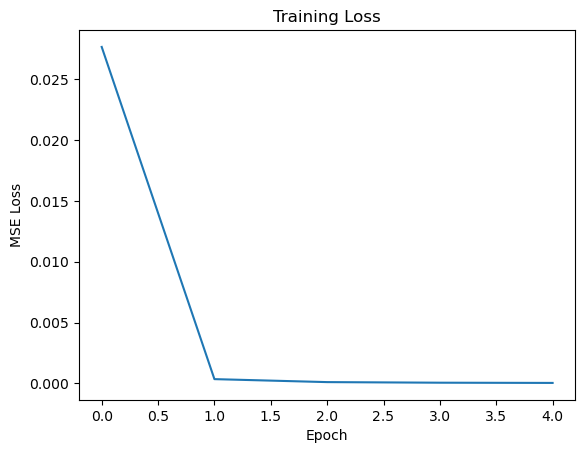

Model saved to: d:\Standard\Projects\Physics_Simulator\project\models\simple_predictor.pt


In [6]:
# train_predictor.ipynb
# Training AI Predictor on Simulation Sequences

import sys
import os
# Add the parent directory to the Python path to find emergent_simulator
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from emergent_simulator import SimplePredictor, run_simulation, initialize_grid, rule_diffusion

# --- Generate Training Data ---
def generate_sequences(num_sequences=100, steps=10):
    X_data, Y_data = [], []
    for _ in range(num_sequences):
        grid = initialize_grid()
        for _ in range(steps):
            prev = grid.copy()
            grid = rule_diffusion(grid)
            X_data.append(prev)
            Y_data.append(grid)
    return np.array(X_data), np.array(Y_data)

# --- Preprocessing ---
X, Y = generate_sequences(200, 5)
X = torch.tensor(X[:, None, :, :], dtype=torch.float32)
Y = torch.tensor(Y[:, None, :, :], dtype=torch.float32)

loader = DataLoader(TensorDataset(X, Y), batch_size=8, shuffle=True)

# --- Model, Loss, Optimizer ---
model = SimplePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# --- Training Loop ---
epochs = 5
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for x_batch, y_batch in loader:
        optimizer.zero_grad()
        pred = model(x_batch)
        loss = criterion(pred, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss / len(loader))
    print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}")

# --- Plot Loss ---
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Save model
model_path = os.path.join(os.path.dirname(os.getcwd()), "models", "simple_predictor.pt")
torch.save(model.state_dict(), model_path)
print(f"Model saved to: {model_path}")